In [2]:
import tensorflow as tf

In [5]:
mnist = tf.keras.datasets.mnist

In [42]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train = tf.keras.utils.normalize (x_train, axis=1)
# x_test = tf.keras.utils.normalize(x_test, axis=1)
x_train = x_train/255
x_test = x_test/255

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07058824, 0.85882353, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.77647059,
       0.71372549, 0.96862745, 0.94509804, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

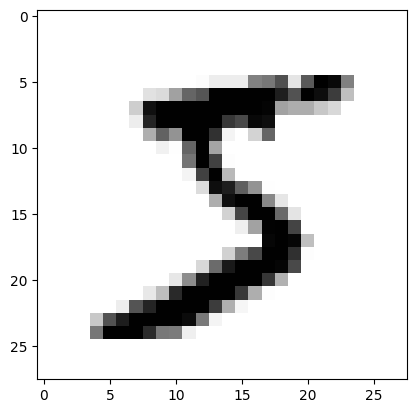

In [43]:
import matplotlib.pyplot as plt
plt.imshow (x_train[0], cmap = plt.cm.binary)
x_train[0][-20]
# plt.show()

In [68]:
model = tf.keras.models.Sequential ()
model.add(tf.keras.layers.Flatten ())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# softmax for propability distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2616 - accuracy: 0.9258
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1132 - accuracy: 0.9666
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0783 - accuracy: 0.9768


In [59]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 441us/step - loss: 0.1372 - accuracy: 0.9596


In [69]:
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model/assets


INFO:tensorflow:Assets written to: num_reader.model/assets


In [70]:
new_model = tf.keras.models.load_model('num_reader.model')


In [74]:
new_model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 490us/step - loss: 0.0871 - accuracy: 0.9732


[0.0871274471282959, 0.9732000231742859]

In [79]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 431us/step


TypeError: Invalid shape (10,) for image data

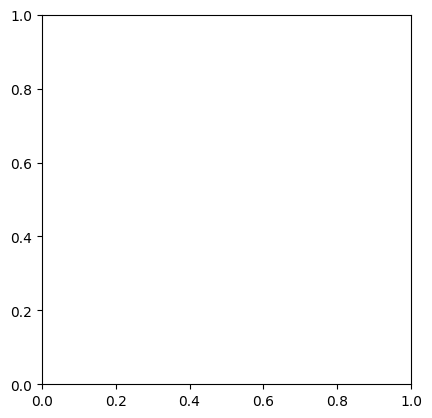

In [84]:
import numpy as np
np.argmax(predictions[0])
predictions[0]
plt.imshow(predictions[0])

In [82]:
# plt.imshow(x_test[0])
y_test[0]

7